In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## Loading the data set


In [322]:
df = pd.read_csv(r'C:\Users\Muzhg\OneDrive\Desktop\housing.csv') 

In [323]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY



## Missing Data Analysis


In [324]:
# Check for missing values
missing_values = df.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(df)) * 100

# Display the missing data statistics
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of Missing Data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [325]:
# Remove rows with missing values
df.dropna(inplace=True)

# Verify that missing values have been removed
print("\nMissing values in each column after removal:")
print(df.isnull().sum())


Missing values in each column after removal:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64



## Data Exploration and Visualization


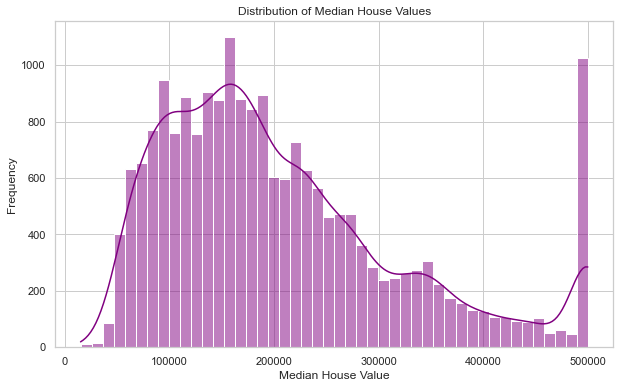

In [326]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], color='purple', kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

## Finding and removing the outliars

In [327]:
# Assuming 'data' is your DataFrame and 'median_house_value' is the column of interest
Q1 = df['median_house_value'].quantile(0.25)
print(Q1)
Q3 = df['median_house_value'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1


# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = df[(df['median_house_value'] >= lower_bound) & (df['median_house_value'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape:", df.shape)
print("New data shape without outliers:", data_no_outliers.shape)

119500.0
264700.0
Original data shape: (20433, 10)
New data shape without outliers: (19369, 10)


In [328]:
df1=data_no_outliers


## Checking for correlations between independent variables


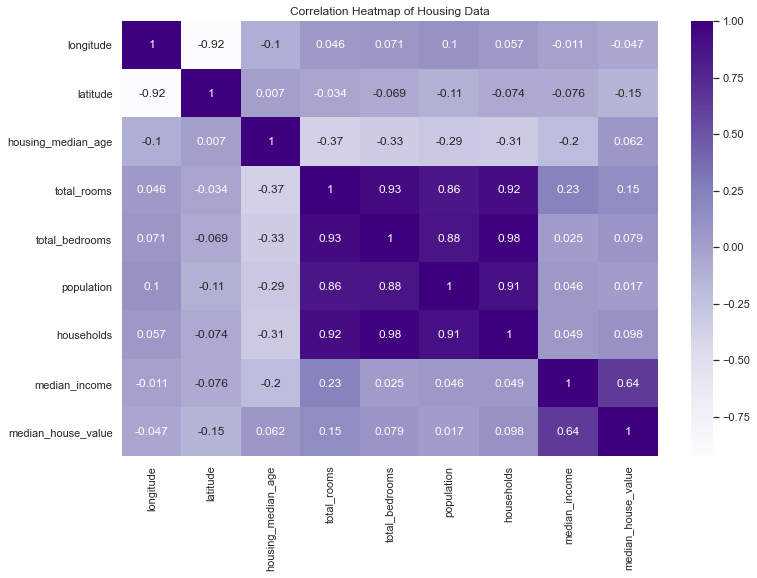

In [329]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True, cmap='Purples')
plt.title('Correlation Heatmap of Housing Data')
plt.show()

In [330]:
df1 = df1.drop("total_bedrooms", axis = 1)
df1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')


## String Data Categorization to Dummy Variables


In [331]:
ocean_proximity_dummies = pd.get_dummies(df1['ocean_proximity'], prefix='ocean_proximity')
df1 = pd.concat([df1.drop("ocean_proximity", axis =1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [332]:
df1 = df1.drop("ocean_proximity_ISLAND", axis = 1)
df1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')


## Splitting the Data into Train/Test


In [333]:
#Define the features (independent variables) and target (dependent variable)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = ["median_house_value"]

X = df1[features]
y = df1[target]


# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 15495 samples
Test set size: 3874 samples



Training 


In [334]:
X_train

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8391,-118.36,33.98,29,2861,1715,775,2.7712,1,0,0,0
16401,-121.23,37.98,27,849,373,131,5.0362,0,1,0,0
20043,-119.00,36.07,20,1042,509,175,2.9815,0,1,0,0
9892,-122.29,38.29,52,3217,1670,671,2.4398,0,0,1,0
8604,-118.37,33.88,26,2620,1282,525,4.4828,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15065,-116.96,32.80,24,2493,1420,643,1.8357,1,0,0,0
9486,-123.18,39.26,25,3066,1558,535,3.7880,1,0,0,0
12371,-116.42,33.76,14,16921,2524,1262,7.6281,0,1,0,0
2845,-118.96,35.40,28,4667,2404,841,3.2325,0,1,0,0


In [335]:
# Adding a constant to the predictors because statsmodels' OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)
X_train_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8391,1.0,-118.36,33.98,29,2861,1715,775,2.7712,1,0,0,0
16401,1.0,-121.23,37.98,27,849,373,131,5.0362,0,1,0,0
20043,1.0,-119.00,36.07,20,1042,509,175,2.9815,0,1,0,0
9892,1.0,-122.29,38.29,52,3217,1670,671,2.4398,0,0,1,0
8604,1.0,-118.37,33.88,26,2620,1282,525,4.4828,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15065,1.0,-116.96,32.80,24,2493,1420,643,1.8357,1,0,0,0
9486,1.0,-123.18,39.26,25,3066,1558,535,3.7880,1,0,0,0
12371,1.0,-116.42,33.76,14,16921,2524,1262,7.6281,0,1,0,0
2845,1.0,-118.96,35.40,28,4667,2404,841,3.2325,0,1,0,0


In [336]:
# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     2199.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:19:44   Log-Likelihood:            -1.9227e+05
No. Observations:               15495   AIC:                         3.846e+05
Df Residuals:                   15483   BIC:                         3.847e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               


## Prediction/Testing


In [337]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set
test_predictions = model_fitted.predict(X_test_const)
test_predictions


13657    145187.470673
18208    244642.130526
20550    109542.486204
14978    192363.337421
14577    225489.860022
             ...      
15777    153944.834131
5479     266004.066647
13878    109027.412134
11390    225063.690594
172      168516.200805
Length: 3874, dtype: float64

In [338]:
X_test_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13657,1.0,-117.30,34.05,7,4672,2534,1046,3.4228,0,1,0,0
18208,1.0,-122.05,37.39,25,347,148,77,4.4531,1,0,0,0
20550,1.0,-121.79,38.69,23,1755,1061,313,2.8864,0,1,0,0
14978,1.0,-116.99,32.71,21,3049,2355,585,3.8904,0,0,0,1
14577,1.0,-117.20,32.82,35,1217,643,237,3.9464,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15777,1.0,-122.41,37.78,52,1928,2124,739,1.1185,0,0,1,0
5479,1.0,-118.45,34.00,48,1923,1142,433,4.5750,1,0,0,0
13878,1.0,-117.35,34.44,9,11810,6716,2081,3.1821,0,1,0,0
11390,1.0,-117.97,33.74,16,1735,784,360,4.2566,1,0,0,0


In [339]:
y_test

,median_house_value
13657,115700
18208,350000
20550,103100
14978,113800
14577,171600
...,...
15777,55000
5479,326700
13878,95600
11390,139200


In [340]:
y_test = y_test.values.flatten()  # Convert DataFrame to a 1D numpy array
test_predictions = test_predictions.values  # Convert Series to a numpy arra


## Checking OLS Assumtions



## Assumtion 1: Linearity


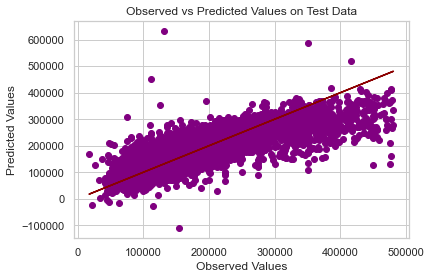

In [341]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "purple")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')
plt.show()




Positive Linear Relationship: The red line (which represents a perfect prediction line) 
and the distribution of the data points suggest there's a positive linear relationship 
between the observed and predicted values. This means that as the actual values increase, 
the predicted values also increase, which is a good sign for linearity.


 ## Assumtion 2: Random Sample


In [342]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals,2)}")


The mean of the residuals is -0.0


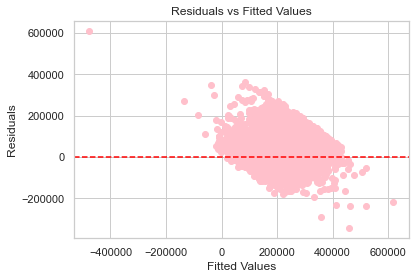

In [343]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "pink")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In this plot, there are no noticeable patterns. The residuals are scattered randomly 
around the horizontal line at zero, without any distinct shape or trend.
If a pattern were present, or if the residuals consistently deviated 
from zero, it might indicate problems like model misspecification,
non-linearity, or missing important variables

## Assumtion 3: Exogeneity

In [344]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')

Correlation between residuals and longitude: -0.0
Correlation between residuals and latitude: 0.0
Correlation between residuals and housing_median_age: -0.0
Correlation between residuals and total_rooms: -0.0
Correlation between residuals and population: -0.0
Correlation between residuals and households: -0.0
Correlation between residuals and median_income: 0.0
Correlation between residuals and ocean_proximity_<1H OCEAN: -0.0
Correlation between residuals and ocean_proximity_INLAND: 0.0
Correlation between residuals and ocean_proximity_NEAR BAY: -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: 0.0


Durbin-Wu-Hausman Test: To conduct a more formal statistical test,
you can use the Durbin-Wu-Hausman test. This test compares your current model to an
alternative model that includes an instrumental variable. It evaluates whether 
the coefficients of the original model significantly change when the potentially
endogenous variables are replaced with their instrumented values. This advanced
econometric approach helps determine the presence of endogeneity, but it requires 
the identification of suitable instruments, which can be challenging.

## Assumtion 4: Homoskedasticty

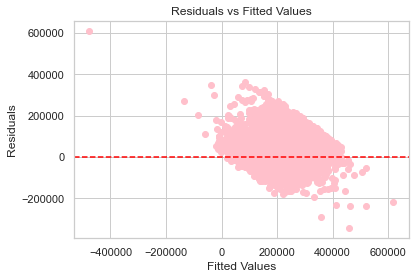

In [345]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "pink")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

Random Scatter:
If the plot shows a random scatter of residuals around the horizontal line at zero, it supports 
the assumption of homoscedasticity, indicating that the variance of the residuals is 
constant across all levels of the independent variables.

Pattern or Shape:
If the residuals display a distinct pattern, such as a curve, or form a funnel shape where the 
spread increases with the fitted values, it suggests heteroscedasticity. 
This means that the variance of the residuals changes with the level of the independent variables.

In [346]:
# I want to see how exactly my model looks like.
intercept = model_fitted.params['const']
coefficients = model_fitted.params[1:]

model_formula = f"y = {intercept:.4f} + " + " + ".join([f"{coeff:.4f}*{name}" for name, coeff in coefficients.items()])
print("\nActual Model Formula:")
print(model_formula)



Actual Model Formula:
y = -1742285.4038 + -22646.5427*longitude + -20993.4899*latitude + 858.1351*housing_median_age + -1.1548*total_rooms + -32.1831*population + 116.4795*households + 35501.3996*median_income + -175486.1964*ocean_proximity_<1H OCEAN + -216550.0062*ocean_proximity_INLAND + -182625.5011*ocean_proximity_NEAR BAY + -173037.2341*ocean_proximity_NEAR OCEAN
